# **Preprocessing Data**

In [3]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [4]:
# Running in Google Colab
!mkdir main
!wget -P main/ https://raw.githubusercontent.com/muchlisp01/Data-Mining-Kelompok-8/main/rumah.csv
rumah = pd.read_csv('main/rumah.csv')

--2021-04-12 14:17:58--  https://raw.githubusercontent.com/muchlisp01/Data-Mining-Kelompok-8/main/rumah.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57536 (56K) [text/plain]
Saving to: ‘main/rumah.csv’

rumah.csv           100%[===================>]  56.19K  --.-KB/s    in 0.008s  

2021-04-12 14:17:59 (6.99 MB/s) - ‘main/rumah.csv’ saved [57536/57536]



In [ ]:
rumah.head()

,no,Tgl_Iklan,url,harga,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
0,1,05-04-2021,https://www.rumah123.com/properti/medan/hos812...,300000000,Medan,120,120,3,2,0,0,0,0,1300,SHM,Perumnas Helvetia,Alamat perumnas helvetia gang kemuning 10\n\n\...
1,2,05-04-2021,https://www.rumah123.com/properti/medan/hos812...,488000000,Medan,72,60,3,2,0,0,1,0,2200,SHM,Perumahan Cantik Modren Luckville New 2lantai ...,STOCK TERBATAS HARGA HOT LOKASI STRATEGIS PINT...
2,3,04-04-2021,https://www.rumah123.com/properti/medan/hos812...,1050000000,Medan,96,96,3,3,0,0,0,0,2200,SHM,Ready Stok Hunian Mewah,PROMO TAHUN BARU BELI RUMAH GRATIS BIAYA*\n\n*...
3,4,04-04-2021,https://www.rumah123.com/properti/medan/hos812...,302500000,Medan,82,82,3,1,0,0,0,0,1300,SHM,Perumahan seekocik,Pilihan terbaik untuk para milenial NEW LAUNCH...
4,5,04-04-2021,https://www.rumah123.com/properti/medan/hos812...,210000000,Medan,84,50,2,1,0,0,0,0,1300,SHM,termurah johor saat ini cash 210 juta,Hub opi hp/wa 081370710493\n\nSoft Launching\n...


In [ ]:
rumah.tail(5)

,no,Tgl_Iklan,url,harga,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
95,96,27-03-2021,https://www.rumah123.com/properti/medan/hos808...,1200000000,Medan,114,300,4,3,0,0,0,0,2200,SHM,rumah cantik luas 2 lantai murah pinggir jalan,Hub opi hp/wa 081370710493\n\nDijual rumah di ...
96,97,27-03-2021,https://www.rumah123.com/properti/medan/hos808...,1200000000,Medan,351,351,3,4,0,0,0,0,2200,SHM,komplek permai tanjung gusta,"Komplex Tanjung Permai Tanjung Gusta, Kota Med..."
97,98,27-03-2021,https://www.rumah123.com/properti/medan/hos808...,350000000,Medan,84,84,2,1,0,0,0,0,1300,SHM,The CLUSTER GDP Johor,*KAWASAN JOHOR* adalah kawasan yang banyak di ...
98,99,27-03-2021,https://www.rumah123.com/properti/medan/hos808...,650000000,Medan,48,110,2,2,0,0,0,0,1300,SHM,RUMAH DENGAN KONDISI SIAP HUNI,DIJUAL RUMAH DI JALAN BRIGJEN KATAMSO KOMPLEK ...
99,100,27-03-2021,https://www.rumah123.com/properti/medan/hos808...,358000000,Medan,60,60,2,2,0,0,0,0,2200,SHM,Perumahan Cantik Mewah dan Nyaman Salsabila To...,*Salsabila Town House*\nJln Stasiun Kampung La...


In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(rumah))

# Ukuran Data
N, P = rumah.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 100, ', Kolom = ', 17)

### Tipe data variabel

In [7]:
# Drop kolom pertama karena tidak berguna (hanya index)
rumah.drop("no", axis=1, inplace=True)
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tgl_Iklan  100 non-null    object
 1   url        100 non-null    object
 2   harga      100 non-null    int64 
 3   Kota       100 non-null    object
 4   LT         100 non-null    int64 
 5   LB         100 non-null    int64 
 6   KT         100 non-null    int64 
 7   KM         100 non-null    int64 
 8   KTP        100 non-null    int64 
 9   KMP        100 non-null    int64 
 10  carport    100 non-null    int64 
 11  garasi     100 non-null    int64 
 12  listrik    100 non-null    int64 
 13  surat      100 non-null    object
 14  judul      100 non-null    object
 15  deskripsi  100 non-null    object
dtypes: int64(10), object(6)
memory usage: 12.6+ KB


In [ ]:
#mengecek apakah ada duplikat data?
print(rumah.shape)
rumah.duplicated().sum()

(100, 16)


0

### variable dummy untuk surat

In [ ]:
df = pd.get_dummies(rumah['surat'], prefix='surat')
df.head()

,surat_HGB,surat_PPJB,surat_SHM
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df2 = pd.concat([rumah, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
no,1,2,3,4,5
Tgl_Iklan,05-04-2021,05-04-2021,04-04-2021,04-04-2021,04-04-2021
url,https://www.rumah123.com/properti/medan/hos812...,https://www.rumah123.com/properti/medan/hos812...,https://www.rumah123.com/properti/medan/hos812...,https://www.rumah123.com/properti/medan/hos812...,https://www.rumah123.com/properti/medan/hos812...
harga,300000000,488000000,1050000000,302500000,210000000
Kota,Medan,Medan,Medan,Medan,Medan
LT,120,72,96,82,84
LB,120,60,96,82,50
KT,3,3,3,3,2
KM,2,2,3,1,1
KTP,0,0,0,0,0


### **outlier removal**

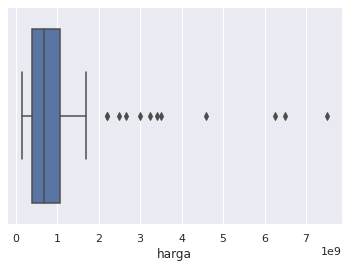

In [19]:
p = sns.boxplot(x="harga", data=rumah)

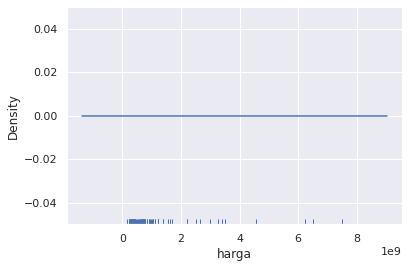

In [20]:
# Distributions
p = sns.distplot(rumah['harga'], kde=True, rug=True)

In [21]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df = np.abs(rumah.harga - rumah.harga.mean())<=(2*rumah.harga.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(100,)


0    True
1    True
2    True
3    True
4    True
Name: harga, dtype: bool

In [22]:
rumah2 = rumah[df] # Data tanpa outliers
print(rumah2.shape, rumah.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(96, 16) (100, 16)


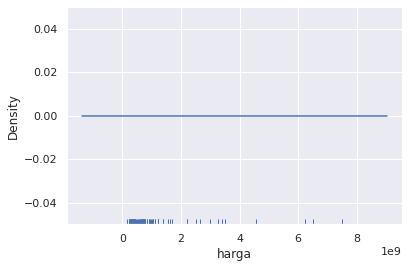

In [16]:
# Distributions
p = sns.distplot(rumah['harga'], kde=True, rug=True)

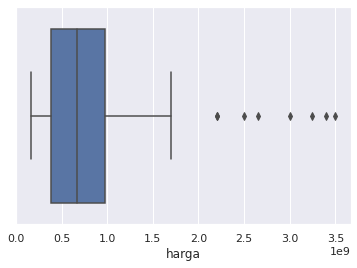

In [24]:
p = sns.boxplot(x="harga", data=rumah2)

### Missing value

In [ ]:
# missing value
print(rumah2.isnull().sum())

Tgl_Iklan    0
url          0
harga        0
Kota         0
LT           0
LB           0
KT           0
KM           0
KTP          0
KMP          0
carport      0
garasi       0
listrik      0
surat        0
judul        0
deskripsi    0
dtype: int64


## Statistika Deskriptif

In [ ]:
rumah2.describe()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,8.389875e+08,133.218750,121.750000,2.802083,2.010417,0.041667,0.041667,0.145833,0.041667,1609.375000
std,7.083791e+08,124.986837,99.567063,1.052514,1.192033,0.247797,0.200875,0.383314,0.247797,858.772456
min,1.650000e+08,45.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.825000e+08,75.750000,55.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
50%,6.700000e+08,90.000000,90.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
75%,9.812500e+08,132.000000,136.250000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2200.000000
max,3.500000e+09,900.000000,600.000000,6.000000,7.000000,2.000000,1.000000,2.000000,2.000000,5500.000000


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
rumah2.describe(include='all')

,Tgl_Iklan,url,harga,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
count,96,96,9.600000e+01,96,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96,96,96
unique,27,90,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,91,94
top,27-03-2021,https://www.rumah123.com/properti/medan/hos801...,NaN,Medan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM,Ready Stok Hunian Mewah,*KAWASAN JOHOR* adalah kawasan yang banyak di ...
freq,15,2,NaN,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,2,2
mean,NaN,NaN,8.389875e+08,NaN,133.218750,121.750000,2.802083,2.010417,0.041667,0.041667,0.145833,0.041667,1609.375000,NaN,NaN,NaN
std,NaN,NaN,7.083791e+08,NaN,124.986837,99.567063,1.052514,1.192033,0.247797,0.200875,0.383314,0.247797,858.772456,NaN,NaN,NaN
min,NaN,NaN,1.650000e+08,NaN,45.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,3.825000e+08,NaN,75.750000,55.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,NaN,NaN,NaN
50%,NaN,NaN,6.700000e+08,NaN,90.000000,90.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,NaN,NaN,NaN
75%,NaN,NaN,9.812500e+08,NaN,132.000000,136.250000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2200.000000,NaN,NaN,NaN


## Visualisasi data

In [ ]:
rumah2.corr()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
harga,1.000000,0.685594,0.663522,0.493533,0.576904,0.215285,0.122728,-0.157695,-0.017747,0.245445
LT,0.685594,1.000000,0.754692,0.547491,0.594450,0.362346,0.328754,-0.112947,-0.004036,0.127491
LB,0.663522,0.754692,1.000000,0.594666,0.690470,0.287130,0.199468,-0.121217,-0.020052,0.315378
KT,0.493533,0.547491,0.594666,1.000000,0.832267,0.475913,0.238566,-0.084253,0.072312,0.197724
KM,0.576904,0.594450,0.690470,0.832267,1.000000,0.426150,0.217970,-0.072472,0.034151,0.278567
KTP,0.215285,0.362346,0.287130,0.475913,0.426150,1.000000,0.599171,-0.064646,-0.028571,-0.081000
KMP,0.122728,0.328754,0.199468,0.238566,0.217970,0.599171,1.000000,-0.079747,-0.035245,-0.020594
carport,-0.157695,-0.112947,-0.121217,-0.084253,-0.072472,-0.064646,-0.079747,1.000000,-0.064646,0.021385
garasi,-0.017747,-0.004036,-0.020052,0.072312,0.034151,-0.028571,-0.035245,-0.064646,1.000000,-0.100786
listrik,0.245445,0.127491,0.315378,0.197724,0.278567,-0.081000,-0.020594,0.021385,-0.100786,1.000000


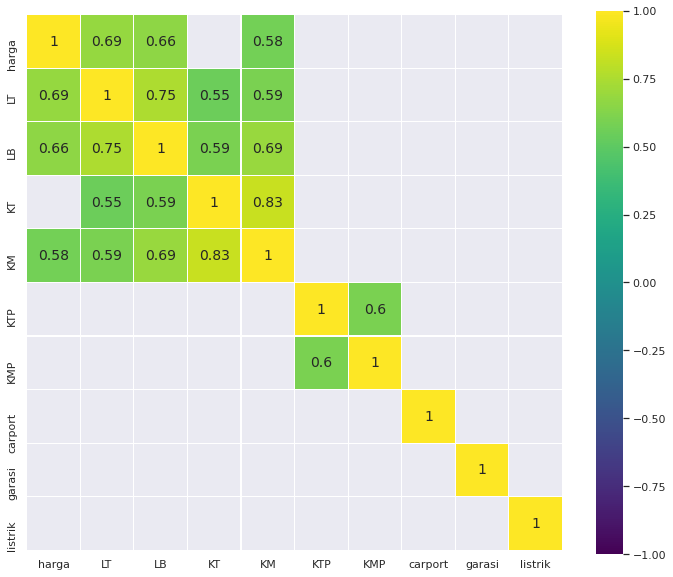

In [26]:
# HeatMap untuk menyelidiki korelasi
corr2 = rumah2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

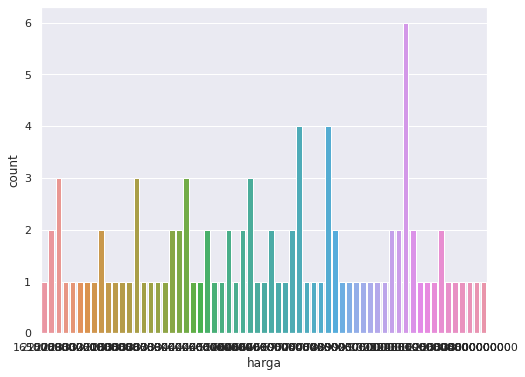

In [25]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="harga", data=rumah2)

###Adakah kecenderungan antara harga rumah dengan besar listrik?

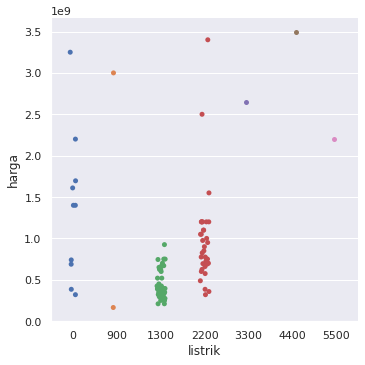

In [27]:
p= sns.catplot(x="listrik", y="harga", data=rumah2)

rata-rata rumah yg di jual memuat besar listrik 1300 dan 2200

###Adakah kecenderungan antara harga rumah dengan jenis surat?

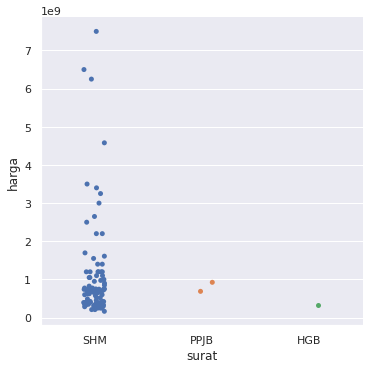

In [ ]:
p= sns.catplot(x="surat", y="harga", data=rumah)

Rumah lebih banyak di jual dengan surat SHM, dengan jenis surat SHM memiliki harga yang paling tinggi di banding jenis surat lainnya

### Adakah kecenderungan antara harga rumah dengan banyak kamar tidurt?

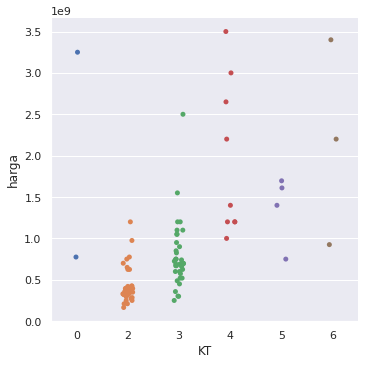

In [30]:
p= sns.catplot(x="KT", y="harga", data=rumah2)

### Adakah kecenderungan antara harga rumah dengan banyak kamar mandi?

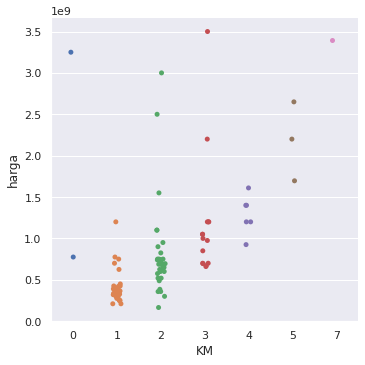

In [31]:
p= sns.catplot(x="KM", y="harga", data=rumah2)

##**kesimpulannya :**
Berdasarkan hasil EDA


*   Harga rumah di Medan dipengaruhi oleh Luas Tanah, Luas Bangunan, dan kamar mandi.
*   Banyaknya kamar tidur dan kamar mandi saling mempengaruhi.
*   Kamar tidur pembantu, kamar mandi pembantu, carport, garasi dan besarnya listrik tidak mempengaruhi harga.
*   Kamar tidur pembantu dan kamar mandi pembantu saling mempengaruhi.



## Clustering

In [46]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 1.2MB 13.5MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=f172ce1c261e5e8726f3edcdbd8964cf2343be680929cb81cc72fd7251f46748
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=48d93057a3546331dc9c7329c6839b3cea2f63d00edcf9bdc04f04fa01b4e296
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
--2021-04-12 16:26:54--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:

In [47]:
import warnings; warnings.simplefilter('ignore')
import umap, tau_unsup as tau
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)

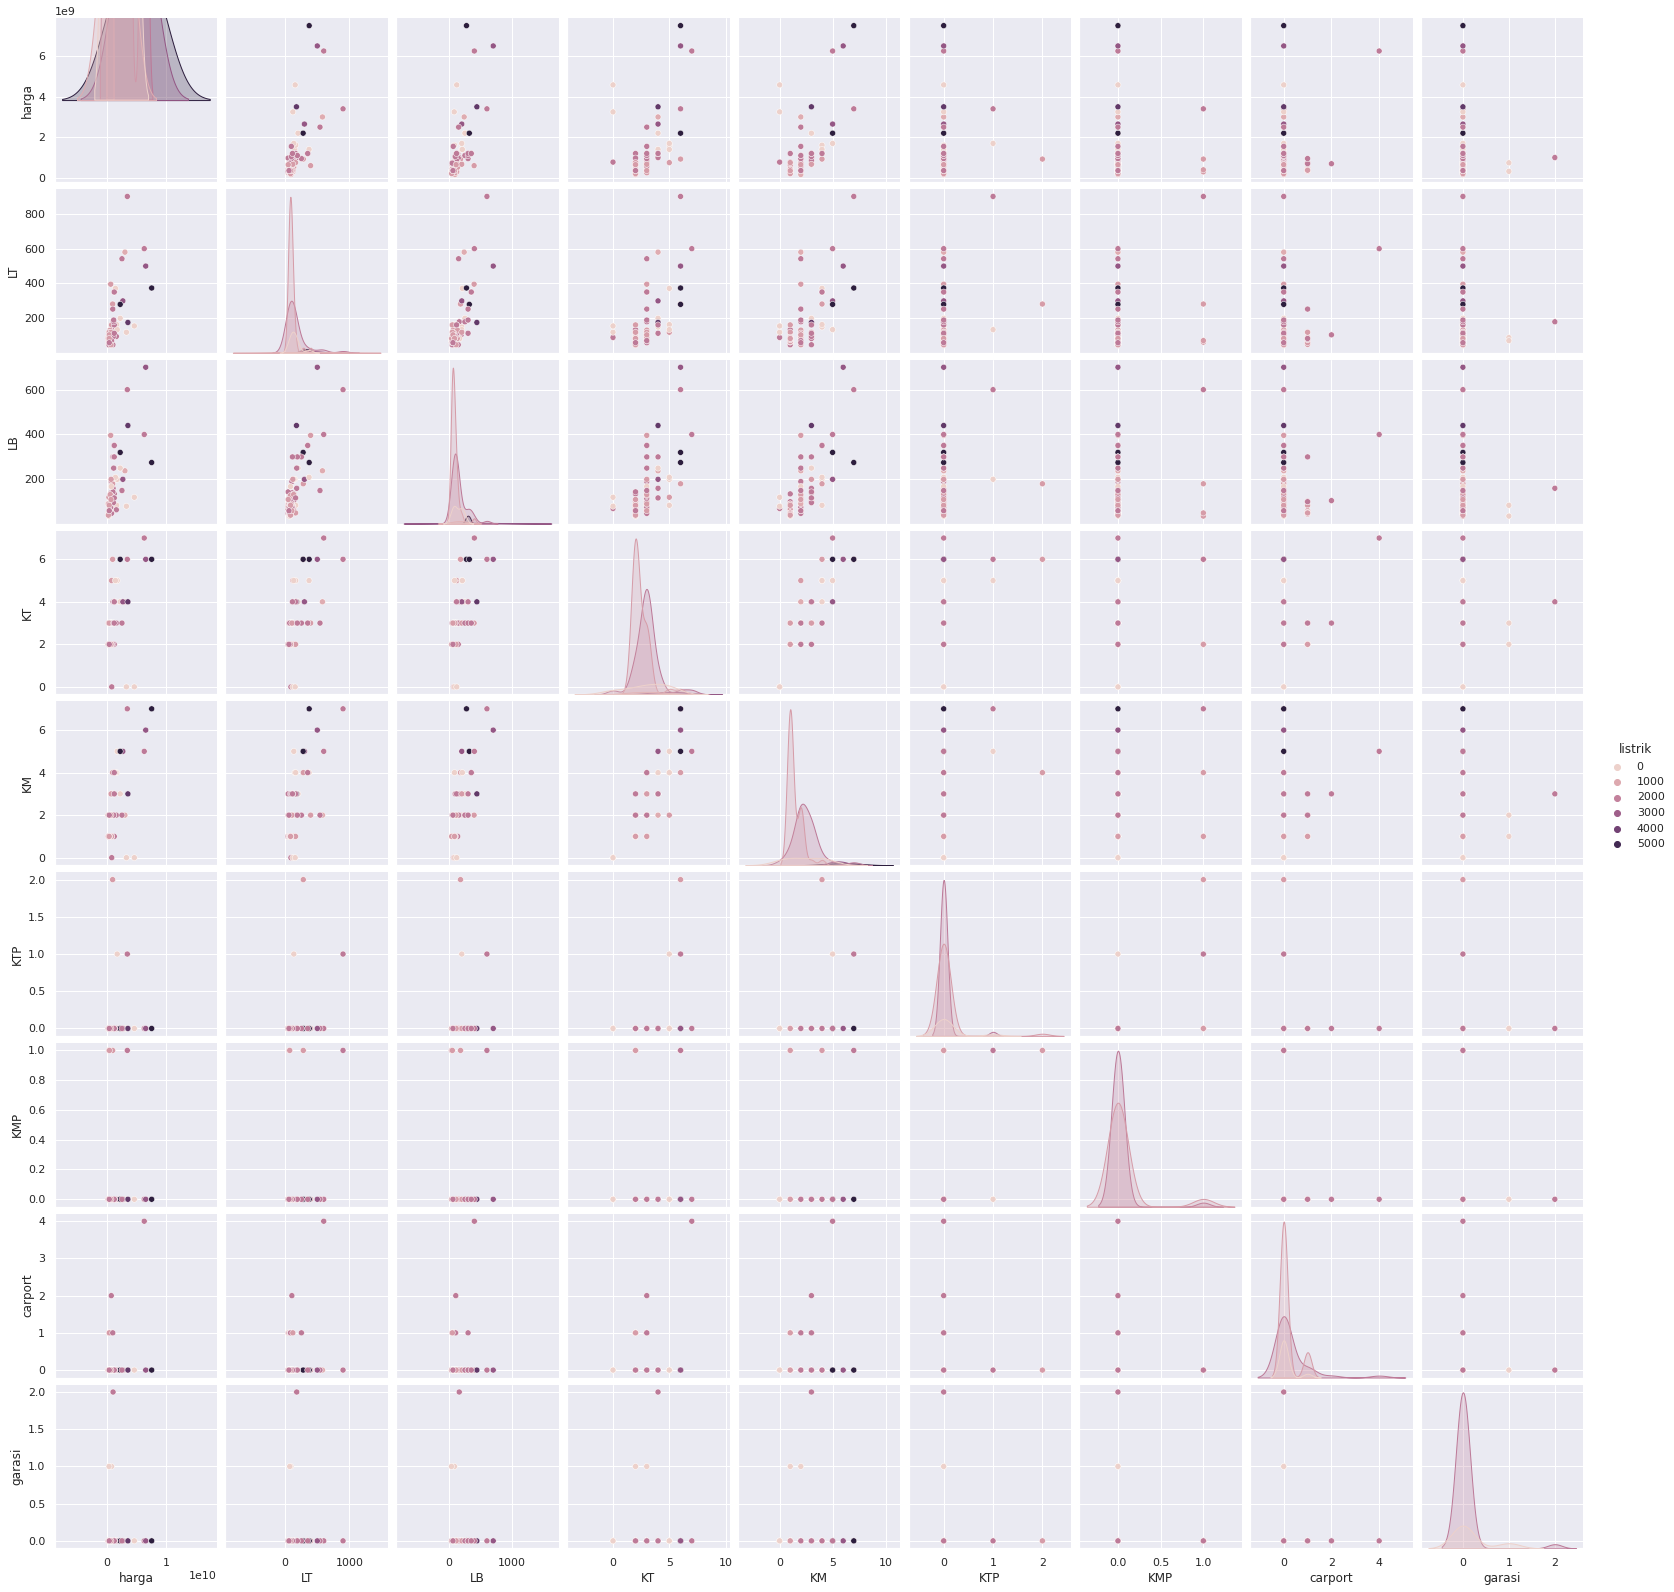

In [ ]:
g = sns.pairplot(rumah, hue="listrik")

### Memisahkan data numeric dan kategorik

In [78]:
rumah2['harga'] = rumah2['harga'].astype('int64')
rumah2['listrik'] = rumah2['listrik'].astype('float64')
rumah2.dtypes

Tgl_Iklan     object
url           object
harga          int64
Kota          object
LT             int64
LB             int64
KT             int64
KM             int64
KTP            int64
KMP            int64
carport        int64
garasi         int64
listrik      float64
surat         object
judul         object
deskripsi     object
dtype: object

In [79]:
rumah_num = rumah2.select_dtypes(include=['int64','float64'])
rumah_num.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,300000000,120,120,3,2,0,0,0,0,1300.0
1,488000000,72,60,3,2,0,0,1,0,2200.0
2,1050000000,96,96,3,3,0,0,0,0,2200.0
3,302500000,82,82,3,1,0,0,0,0,1300.0
4,210000000,84,50,2,1,0,0,0,0,1300.0


In [40]:
rumah_cat = rumah2.select_dtypes(include=['object'])
rumah_cat.head()

,Tgl_Iklan,url,Kota,surat,judul,deskripsi
0,05-04-2021,https://www.rumah123.com/properti/medan/hos812...,Medan,SHM,Perumnas Helvetia,Alamat perumnas helvetia gang kemuning 10\n\n\...
1,05-04-2021,https://www.rumah123.com/properti/medan/hos812...,Medan,SHM,Perumahan Cantik Modren Luckville New 2lantai ...,STOCK TERBATAS HARGA HOT LOKASI STRATEGIS PINT...
2,04-04-2021,https://www.rumah123.com/properti/medan/hos812...,Medan,SHM,Ready Stok Hunian Mewah,PROMO TAHUN BARU BELI RUMAH GRATIS BIAYA*\n\n*...
3,04-04-2021,https://www.rumah123.com/properti/medan/hos812...,Medan,SHM,Perumahan seekocik,Pilihan terbaik untuk para milenial NEW LAUNCH...
4,04-04-2021,https://www.rumah123.com/properti/medan/hos812...,Medan,SHM,termurah johor saat ini cash 210 juta,Hub opi hp/wa 081370710493\n\nSoft Launching\n...


In [80]:
#Mengubah dataframe menjadi array
c_data = np.array(rumah_num.iloc[:,1:-1])
c_data[:5]

array([[120, 120,   3,   2,   0,   0,   0,   0],
       [ 72,  60,   3,   2,   0,   0,   1,   0],
       [ 96,  96,   3,   3,   0,   0,   0,   0],
       [ 82,  82,   3,   1,   0,   0,   0,   0],
       [ 84,  50,   2,   1,   0,   0,   0,   0]])

In [42]:
#Scaling data menggunakan MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
c_scaled = mm.fit_transform(c_data)
c_scaled[:5]

array([[0.0877193 , 0.14893617, 0.5       , 0.28571429, 0.        ,
        0.        , 0.        , 0.        ],
       [0.03157895, 0.04255319, 0.5       , 0.28571429, 0.        ,
        0.        , 0.5       , 0.        ],
       [0.05964912, 0.10638298, 0.5       , 0.42857143, 0.        ,
        0.        , 0.        , 0.        ],
       [0.04327485, 0.08156028, 0.5       , 0.14285714, 0.        ,
        0.        , 0.        , 0.        ],
       [0.04561404, 0.0248227 , 0.33333333, 0.14285714, 0.        ,
        0.        , 0.        , 0.        ]])

In [43]:
#Mengubah array menjadi dataframe
c_scaled = pd.DataFrame(c_scaled)
c_scaled.head()

,0,1,2,3,4,5,6,7
0,0.087719,0.148936,0.500000,0.285714,0.0,0.0,0.0,0.0
1,0.031579,0.042553,0.500000,0.285714,0.0,0.0,0.5,0.0
2,0.059649,0.106383,0.500000,0.428571,0.0,0.0,0.0,0.0
3,0.043275,0.081560,0.500000,0.142857,0.0,0.0,0.0,0.0
4,0.045614,0.024823,0.333333,0.142857,0.0,0.0,0.0,0.0


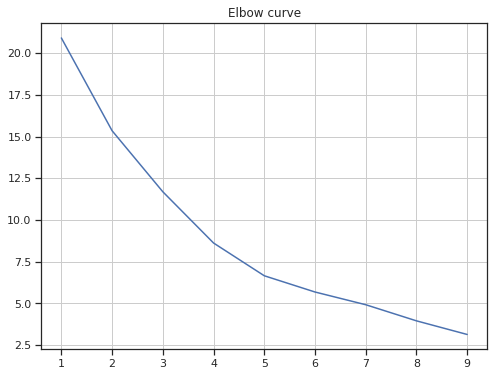

In [48]:
#Menggunakan Elbow Method untuk menentukan banyaknya cluster
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(c_scaled)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

Dari hasil elbow Method di bagi menjadi 3 cluster

array([3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 0, 3, 3, 4, 0, 0, 4, 3, 3,
       0, 0, 3, 0, 4, 3, 3, 4, 0, 0, 1, 3, 3, 2, 3, 3, 2, 3, 3, 0, 3, 0,
       3, 3, 3, 1, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 4, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 4,
       0, 3, 0, 0, 0, 3, 3, 3], dtype=int32)

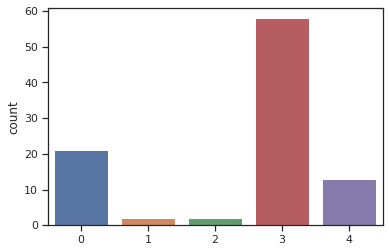

In [99]:
# visualisasi 5 clustering
kmp1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp1.fit(c_scaled)
C_kmp1 = kmp1.predict(c_scaled)

sns.countplot(C_kmp1);
kmp1.labels_

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 0, 0, 3, 1, 1,
       0, 0, 1, 0, 3, 1, 1, 3, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 3,
       0, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

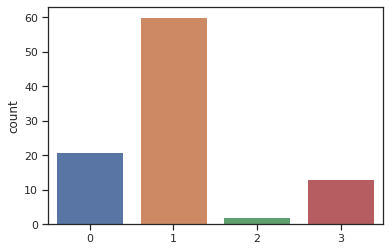

In [100]:
# visualisasi 4 clustering
kmp2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp2.fit(c_scaled)
C_kmp2 = kmp2.predict(c_scaled)

sns.countplot(C_kmp2);
kmp2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

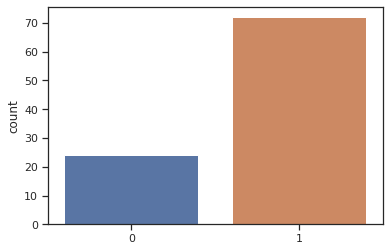

In [101]:
# visualisasi 2 clustering
kmp3 = KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp3.fit(c_scaled)
C_kmp3 = kmp3.predict(c_scaled)

sns.countplot(C_kmp3);
kmp3.labels_

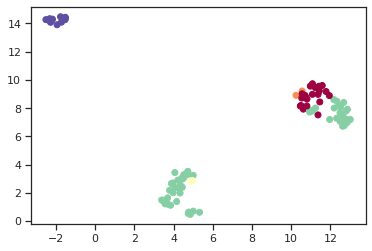

In [60]:
X2D = umap.UMAP(random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp1, cmap='Spectral');

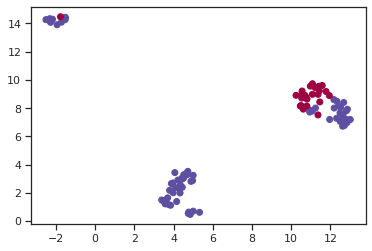

In [97]:
X2D = umap.UMAP(random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp2, cmap='Spectral');

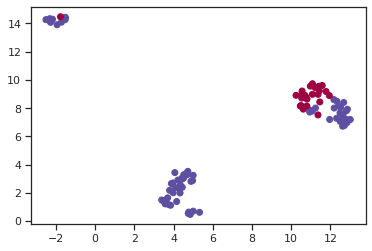

In [102]:
X2D = umap.UMAP(random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp3, cmap='Spectral');

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


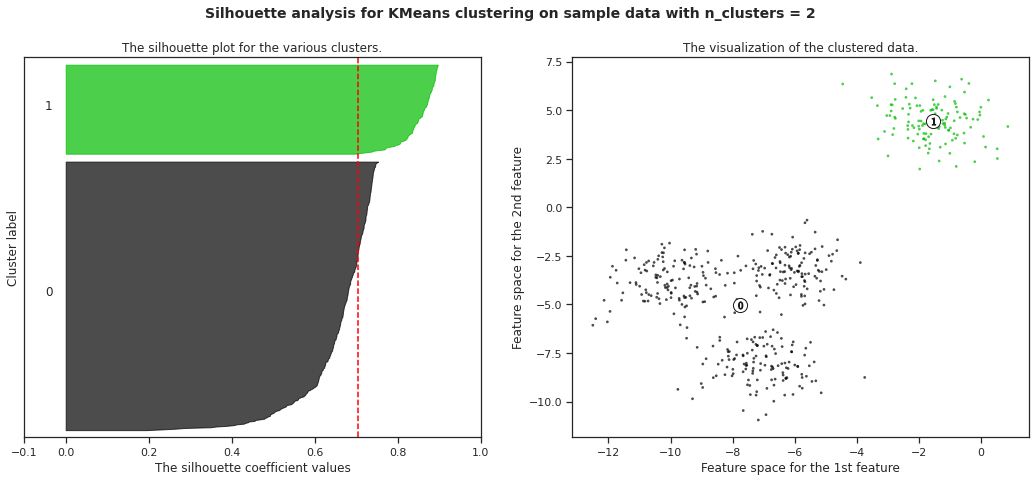

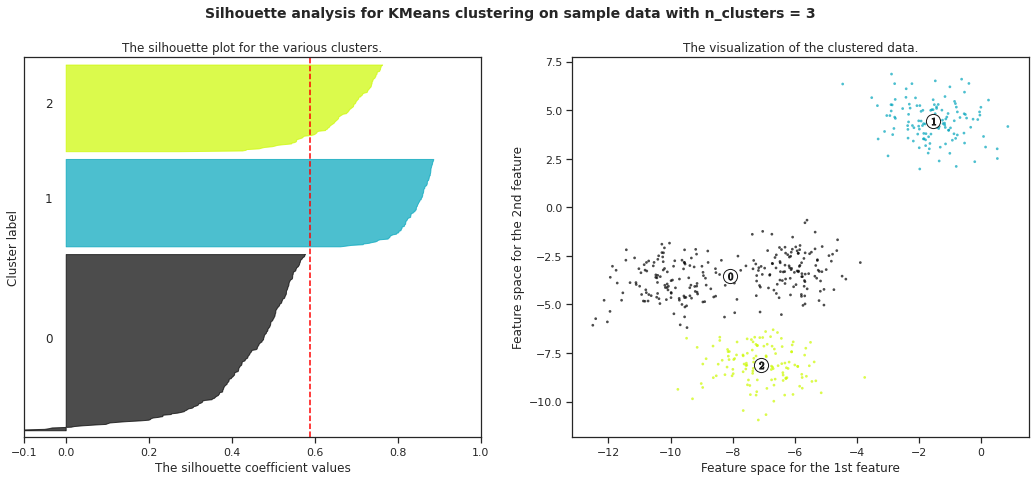

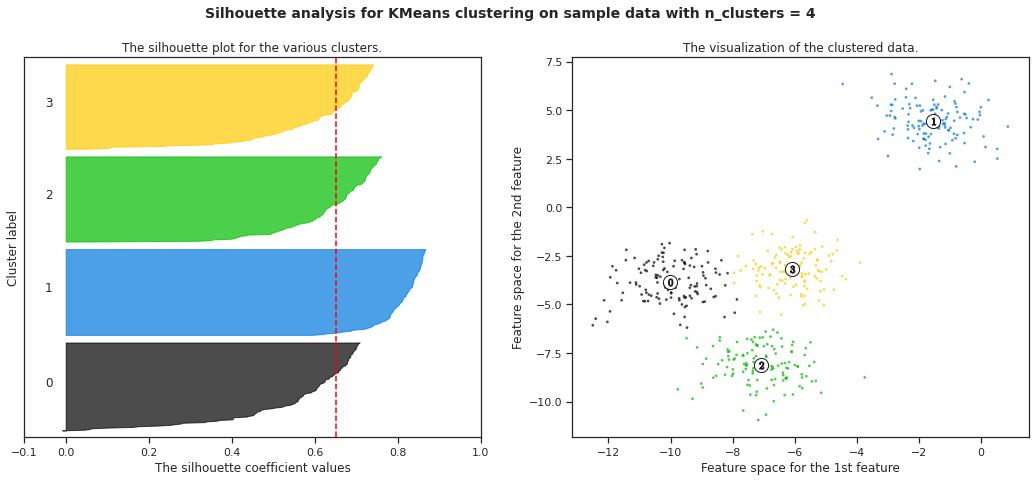

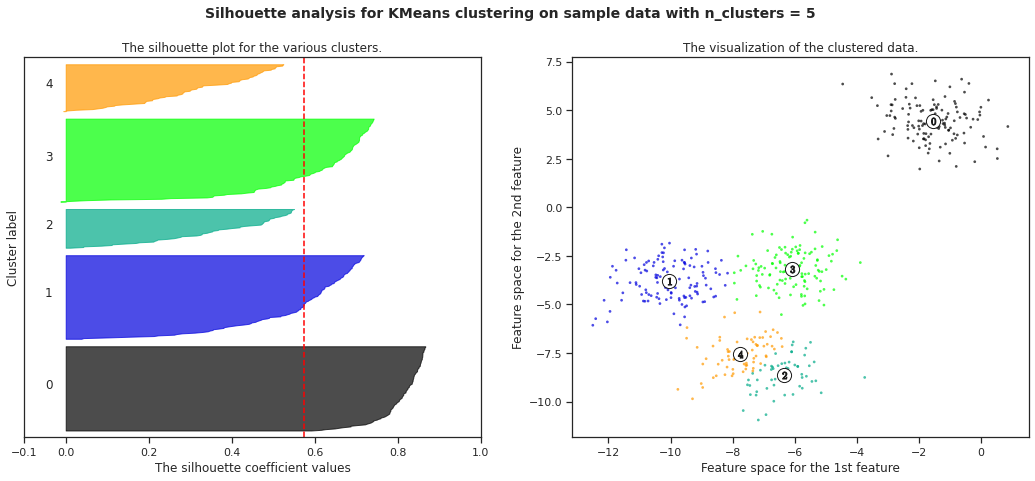

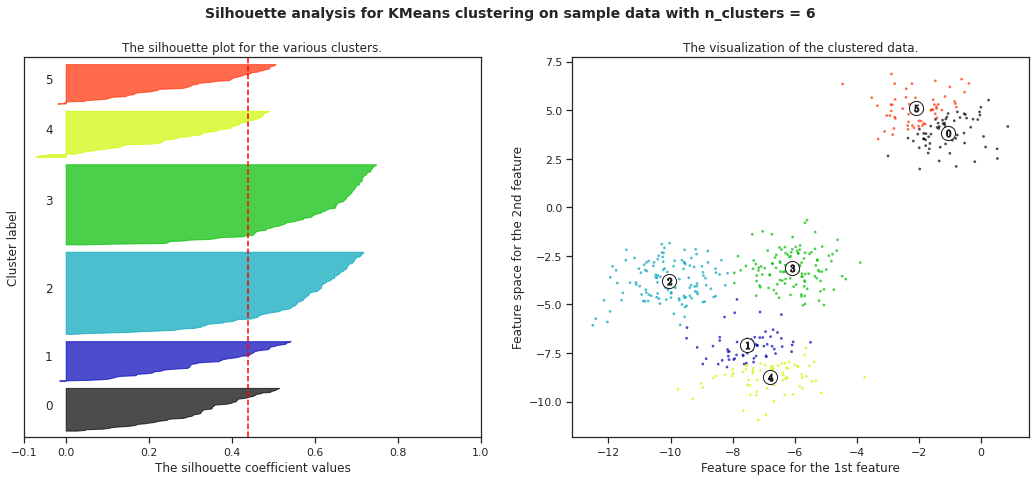

In [63]:
tau.sil_based_optimal_km()

In [64]:
Hasil_Clustering = [C_kmp1, C_kmp2, C_kmp3]
for res in Hasil_Clustering:
    print(siluet(c_scaled,res), end=', ')

0.4927090142449346, 0.4093701988749998, 0.4093701988749998, 

# Hasil Clustering

In [88]:
kmp.cluster_centers_

array([[ 2.38373712e-01,  3.54356636e-01,  6.58730159e-01,
         4.62585034e-01,  2.38095238e-02,  1.38777878e-17,
        -1.38777878e-17,  4.76190476e-02],
       [ 6.38596491e-01,  6.27659574e-01,  1.00000000e+00,
         7.85714286e-01,  7.50000000e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.63157895e-02,  1.24113475e-02,  3.33333333e-01,
         1.42857143e-01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.82153660e-02,  8.01235021e-02,  3.93678161e-01,
         2.21674877e-01,  0.00000000e+00,  0.00000000e+00,
         4.16333634e-17,  1.72413793e-02],
       [ 5.94691858e-02,  9.43807965e-02,  4.23076923e-01,
         2.41758242e-01,  0.00000000e+00,  0.00000000e+00,
         5.38461538e-01,  0.00000000e+00]])

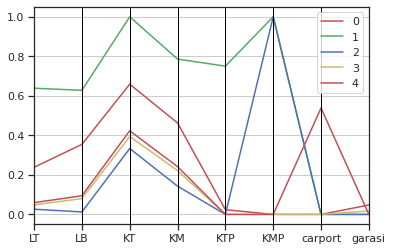

In [103]:
cols = ['LT','LB','KT','KM','KTP','KMP','carport','garasi']
dfC = pd.DataFrame(kmp.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y'))
plt.show()

Cluster 0

*   Luas tanah lebih kecil dari luas bangunan
*   jumlah kamar tidur lebih banyak di banding kamar mandi
*   Tidak memuat kamar tidur dan kamar mandi pembantu
*   memiliki carport namun tidak memiliki garasi

Cluster 1
*   Luas tanah sama dengan dari luas bangunan
*   jumlah kamar tidur lebih banyak di banding kamar mandi
*   memuat kamar tidur dan kamar mandi pembantu
*   tidak memiliki carport dan tidak memiliki garasi

Cluster 2
*   Luas tanah lebih lebih besar dari luas bangunan
*   jumlah kamar tidur lebih banyak di banding kamar mandi
*   tidak memuat kamar tidur pembantu namun ada kamar mandi pembantu/kamar mandi tambahan
*   tidak memiliki carport dan tidak memiliki garasi

Cluster 3
*   Luas tanah lebih kecil dari luas bangunan
*   jumlah kamar tidur lebih banyak di banding kamar mandi
*   tidak memuat kamar tidur dan kamar mandi pembantu
*   tidak memiliki carport dan tidak memiliki garasi

Cluster 4
*   Luas tanah lebih sama dengan dari luas bangunan
*   jumlah kamar tidur lebih banyak di banding kamar mandi
*   tidak memuat kamar tidur dan kamar mandi pembantu
*   Memiliki carport dan beberapa memiliki garasi

Rekomendasi Tindakan


*   Rumah di Cluster 3 dan 4 cocok untuk keluarga yang sederhana
*   Jika ingin membeli rumah dengan tanah yang luas dan bangunan yang mewah, dapat dengen memilih cluster 0, namun harga yang harus di keluarkan cukup besar
*   Sebagian besar menjual rumah dengan surat SHM
*   Jika ingin memiliki rumah dengan kamar mandi tambahan maka cluster 2 cocok di pilih.




